# Image Data Augmentation with Keras

![Horizontal Flip](assets/horizontal_flip.jpg)

# Task 1: Import Libraries

In [1]:
%matplotlib inline

import os
import numpy as np
import tensorflow as tf

from PIL import Image
from matplotlib import pyplot as plt

print('Using TensorFlow', tf.__version__)

Using TensorFlow 2.1.0


# Task 2: Rotation

In [2]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rotation_range=40
)

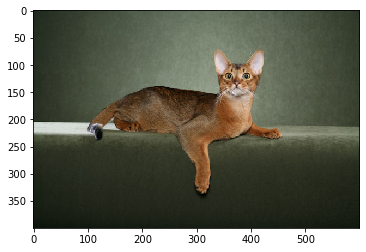

In [3]:
image_path = 'images/train/cat/cat.jpg'

plt.imshow(plt.imread(image_path));

Found 1 images belonging to 1 classes.


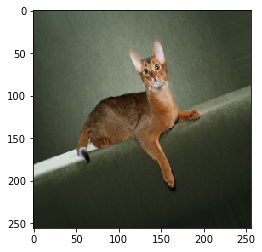

In [4]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 3: Width and Height Shifts

In [5]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    width_shift_range = [-100,-50,0,50,100],
    height_shift_range = [-50,0,50]
    
)

Found 1 images belonging to 1 classes.


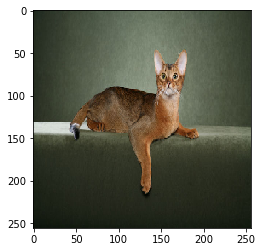

In [13]:
x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 4: Brightness

Found 1 images belonging to 1 classes.


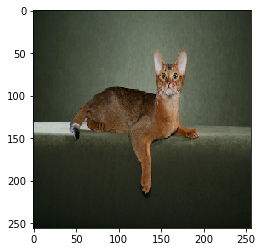

In [15]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    brightness_range=(0.5,2.0)
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 5: Shear Transformation

Found 1 images belonging to 1 classes.


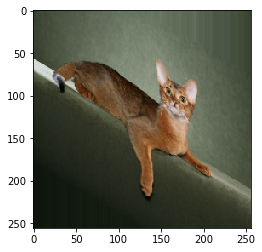

In [16]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    shear_range=40
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 6: Zoom

Found 1 images belonging to 1 classes.


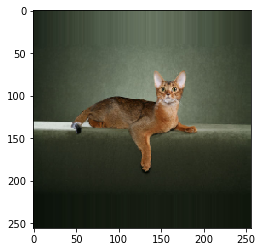

In [22]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    zoom_range=0.5
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 7: Channel Shift

Found 1 images belonging to 1 classes.


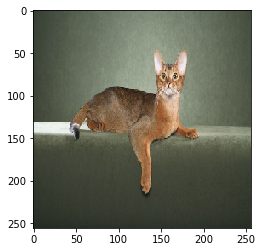

In [26]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    channel_shift_range=100
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

In [27]:
x.mean()

92.558716

In [29]:
np.array(Image.open(image_path)).mean()

69.57810416666666

# Task 8: Flips

Found 1 images belonging to 1 classes.


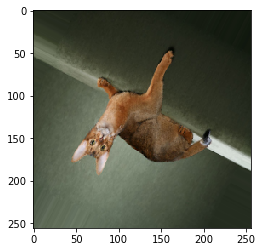

In [38]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=30
)

x, y = next(generator.flow_from_directory('images', batch_size=1))
plt.imshow(x[0].astype('uint8'));

# Task 9: Normalization

### Featurewise

In [41]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
'''
x_mean=x_train.mean()
x_std=x_train.std()
x_train_norm = (x_train - x_mean)/x_std
'''
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    featurewise_center = True,
    featurewise_std_normalization = True
)

generator.fit(x_train)

In [43]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)
print(x_train.mean())

-0.19799857 0.8918883 [[7]]
120.70756512369792


### Samplewise

In [45]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    samplewise_center = True,
    samplewise_std_normalization = True
)

x, y = next(generator.flow(x_train, y_train, batch_size=1))
print(x.mean(), x.std(), y)

1.390775e-07 1.0 [[8]]


# Task 10: Rescale and Preprocessing Function

In [46]:
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    rescale=1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [47]:
x, y = next(generator.flow(x_train, y_train, batch_size=1))

In [48]:
print(x.mean(), x.std(), y)

0.38512304 0.4953719 [[8]]


# Task 11: Using in Model Training

In [52]:
# Your code here
generator = tf.keras.preprocessing.image.ImageDataGenerator(
    # Your code here
    # rescale=1.,
    preprocessing_function = tf.keras.applications.mobilenet_v2.preprocess_input
)

In [53]:
# Your code here
model = tf.keras.models.Sequential({
    tf.keras.applications.mobilenet_v2.MobileNetV2(
        include_top = False, input_shape=(32,32,3),
        pooling='avg'
    ),
    tf.keras.layers.Dense(10,activation = 'softmax')
})
model.compile(
    loss='spares_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

TypeError: The added layer must be an instance of class Layer. Found: {<tensorflow.python.keras.layers.core.Dense object at 0x000002AE0131A588>, <tensorflow.python.keras.engine.training.Model object at 0x000002AE11B81EB8>}